## MACHINE LEARNING

#### Algorítmos de Classificação -> Decision Tree (Árvore de Decisão)

In [19]:
import pandas as pd
import graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score


In [2]:
# Base de dados Credit.csv

credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [3]:
# Separando a base de dados em previsores e a classe

previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

In [4]:
# Conversão das variáveis categóricas do dataset previsoes em numéricas utilizando LabelEncoder() de sklearn

def cat2numeric(previsores, lista_var_categorias):
    
    labelencoder = LabelEncoder()
    for i in lista_var_categorias:
        previsores[:, i] = labelencoder.fit_transform(previsores[:, i])
        
lista_atributos_categoricos = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19] # -> lista com o indice das colunas/variaveis categoricas

cat2numeric(previsores, lista_atributos_categoricos)

In [5]:
previsores

array([[2, 6, 1, ..., 1, 1, 1],
       [1, 48, 3, ..., 1, 0, 1],
       [0, 12, 1, ..., 2, 0, 1],
       ...,
       [0, 12, 3, ..., 1, 0, 1],
       [2, 45, 3, ..., 1, 1, 1],
       [1, 45, 1, ..., 1, 0, 1]], dtype=object)

In [6]:
# Dividindo a base de dados previsores e classe para treino (70%) e teste (30%) com train_test_split()

x_train, x_test, y_train, y_test = train_test_split(previsores, classe, test_size=0.3, random_state=0)

In [7]:
# Criando e treinamendo o modelo
# DecisionTreeClassifier() revebe varios parametros que podem ser utilizados para melhorias no modelo. Esse porcesso é conhecido como "Processo de Poda"


model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
# Exportando a arvore de decisao (o modelo) para o formato .dot para posterior visualizaçao
# Pode-se utilizar o site <webgraphviz.com> para visualização

export_graphviz(model_tree, out_file='tree.dot')

AttributeError: 'list' object has no attribute 'show'

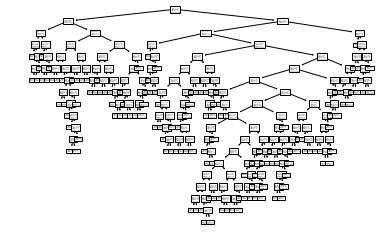

In [24]:
plot_tree(model_tree)

### Previsão

In [9]:
previsoes = model_tree.predict(x_test)
previsoes

array(['bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad

In [11]:
# Matriz de confusao para obtenção das metricas

confusao = confusion_matrix(y_test, previsoes)
confusao

array([[ 45,  41],
       [ 50, 164]], dtype=int64)

In [13]:
# Score

tx_acerto = accuracy_score(y_test, previsoes)
tx_acerto

0.6966666666666667